In [1]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/final_22/224/5k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 845.8607401847839 seconds


In [3]:
len(X_train)

88000

In [25]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/final_22/224/5k/X_validate.npy')

print('Loading X_test...')
X_test = np.load('/home/zxt/data/final_22/224/5k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/final_22/224/5k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/5k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/5k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading labels...
Running time: 30.07222819328308 seconds


In [26]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (88000, 224, 224, 3)
88000 train samples
11000 validate samples
11000 test samples


In [27]:
Y_train.shape

(88000, 1)

In [28]:
Y_validate.shape

(11000, 1)

In [29]:
Y_test.shape

(11000, 1)

In [30]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [31]:
Y_test

array([['fox'],
       ['skunk'],
       ['wildebeest'],
       ...,
       ['zebra'],
       ['buffalo'],
       ['racoon']], dtype='<U16')

In [32]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

In [33]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,22)
y_valid=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [34]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 2.Model structure

In [35]:
def alexnet_s(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    
    # S: add two more layers to train
    x = Dropout(0.4)(x)
    x = Dense(4096,activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(4096,activation='relu')(x)
    
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [36]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

### 3.Data Augmentation

In [37]:
# Data augmentation

# image_datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.3,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     brightness_range=(0.6,1),
#     fill_mode="nearest")

# image_datagen.fit(X_train, augment=True)

### 3.Modeling

In [38]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 40
n_classes = 22
input_shape = 224,224,3

learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [49]:
K.clear_session()
model = None
model = alexnet_s(input_shape, n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0   

In [50]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [51]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=40,
#     callbacks=[early_stopping],
    validation_data = (X_validate,y_valid))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 88000 samples, validate on 11000 samples
Epoch 1/40
88000/88000 [==============================] - 425s 5ms/step - loss: 1.8625 - accuracy: 0.3819 - val_loss: 12.3518 - val_accuracy: 0.0441
Epoch 2/40
88000/88000 [==============================] - 419s 5ms/step - loss: 1.3067 - accuracy: 0.5493 - val_loss: 1.2752 - val_accuracy: 0.5626
Epoch 3/40
88000/88000 [==============================] - 420s 5ms/step - loss: 1.1190 - accuracy: 0.6147 - val_loss: 1.1708 - val_accuracy: 0.5910
Epoch 4/40
88000/88000 [==============================] - 418s 5ms/step - loss: 0.9942 - accuracy: 0.6584 - val_loss: 0.9996 - val_accuracy: 0.6544
Epoch 5/40
88000/88000 [==============================] - 418s 5ms/step - loss: 0.8971 - accuracy: 0.6932 - val_loss: 0.9777 - val_accuracy: 0.6674
Epoch 6/40
88000/88000 [==============================] - 416s 5ms/step - loss: 0.8105 - accuracy: 0.7220 - val_loss: 0.8214 - val_accuracy: 0.7168
Epoch 7/40
88000/88000 [===================

In [72]:
model.save('/home/zxt/data/final_22/model/224_5k/final/alexnet_s_final/proposed_model.h5')
model.save_weights('/home/zxt/data/final_22/model/224_5k/final/alexnet_s_final/proposed_model.ckpt')
model.save_weights('/home/zxt/data/final_22/model/224_5k/final/alexnet_s_final/proposed_model_weights.h5')

In [70]:
start_time = time()
print('Training model...')


hist2 = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=10,
#     callbacks=[early_stopping],
    validation_data = (X_validate,y_valid))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 88000 samples, validate on 11000 samples
Epoch 1/10
88000/88000 [==============================] - 422s 5ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.6401 - val_accuracy: 0.8813
Epoch 2/10
88000/88000 [==============================] - 418s 5ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.6157 - val_accuracy: 0.8799
Epoch 3/10
88000/88000 [==============================] - 420s 5ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.6382 - val_accuracy: 0.8808
Epoch 4/10
88000/88000 [==============================] - 417s 5ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.6183 - val_accuracy: 0.8829
Epoch 5/10
88000/88000 [==============================] - 418s 5ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.6443 - val_accuracy: 0.8842
Epoch 6/10
88000/88000 [==============================] - 415s 5ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.6375 - val_accuracy: 0.8812
Epoch 7/10
88000/88000 [====================

### 4.Evaluation

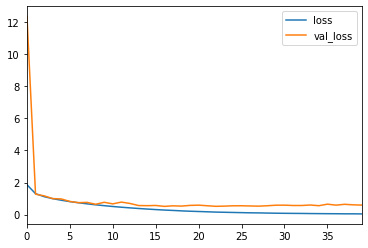

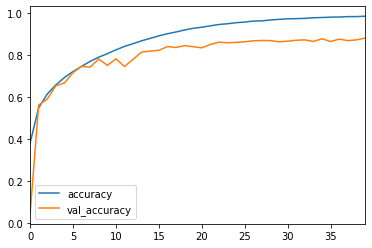

In [53]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [71]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

11000/11000 [==============================] - 34s 3ms/step

test loss 0.6717280075143685
accuracy 0.8889999985694885


In [55]:
y_pred = model.predict(X_test,batch_size=1)

In [56]:
y_pred

array([[3.6538786e-15, 1.9282984e-09, 1.5456089e-09, ..., 3.3303721e-05,
        1.2607802e-08, 1.5128547e-09],
       [2.9527806e-08, 5.6588246e-06, 7.0238104e-07, ..., 3.0505751e-07,
        1.9663064e-06, 9.7019074e-06],
       [3.3961605e-02, 3.7378138e-14, 8.9820853e-04, ..., 5.6223632e-17,
        7.4569011e-11, 1.8372980e-06],
       ...,
       [5.1984711e-07, 4.8895626e-10, 6.9763932e-09, ..., 1.7353728e-13,
        1.6161869e-11, 3.6749715e-04],
       [3.9950926e-05, 2.7431052e-10, 8.5164036e-11, ..., 1.2319358e-12,
        8.3162930e-12, 6.7882852e-12],
       [3.2868477e-10, 6.9064981e-08, 1.0675296e-09, ..., 1.9331607e-09,
        9.9774456e-01, 8.9907320e-05]], dtype=float32)

In [57]:
len(y_pred)

11000

### 6.Check each categoryaccuracy

In [58]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [59]:
y_prediction[:5]

[9, 16, 18, 10, 3]

In [60]:
Y_test[:5]

array([['9'],
       ['16'],
       ['14'],
       ['10'],
       ['3']], dtype='<U16')

In [61]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [62]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [63]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [64]:
prediction_df

,label,label_pre,diff
0,9,9,0
1,16,16,0
2,14,18,-4
3,10,10,0
4,3,3,0
...,...,...,...
10995,0,10,-10
10996,15,15,0
10997,18,18,0
10998,11,11,0


In [65]:
prediction_df.to_csv(r'/home/zxt/data/final_22/prediction/alexnet_s_predictdiff.csv',index=False)

In [66]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon','empty']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20,'empty':21}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    recall = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s recall: %10.3f" %(name,recall) )

elephant recall:      0.786
wild_boar recall:      0.829
gazellethomosons recall:      0.949
squirrel recall:      0.907
hedgehog recall:      0.994
guineafowl recall:      0.961
moose recall:      0.990
coyote recall:      0.926
bird recall:      0.869
fox recall:      0.811
giraffe recall:      0.939
buffalo recall:      0.863
hare recall:      0.975
vehicle recall:      0.945
wildebeest recall:      0.744
cattle recall:      0.743
skunk recall:      0.910
lion recall:      0.812
zebra recall:      0.860
black_bear recall:      0.831
racoon recall:      0.927
empty recall:      0.844


### 7.Confusion Matrix

In [67]:
animal_label_dict = {0:'elephant',1:'wild_boar',2:'gazellethomosons',3:'squirrel',4:'hedgehog',
                    5:'guineafowl',6:'moose',7:'coyote',8:'bird',9:'fox',10:'giraffe',
                    11:'buffalo',12:'hare',13:'vehicle',14:'wildebeest',15:'cattle',
                    16:'skunk',17:'lion',18:'zebra',19:'black_bear',20:'racoon',21:'empty'}     
labels=[]
for i in range(0,22):
    name = animal_label_dict[i]
    labels.append(name)

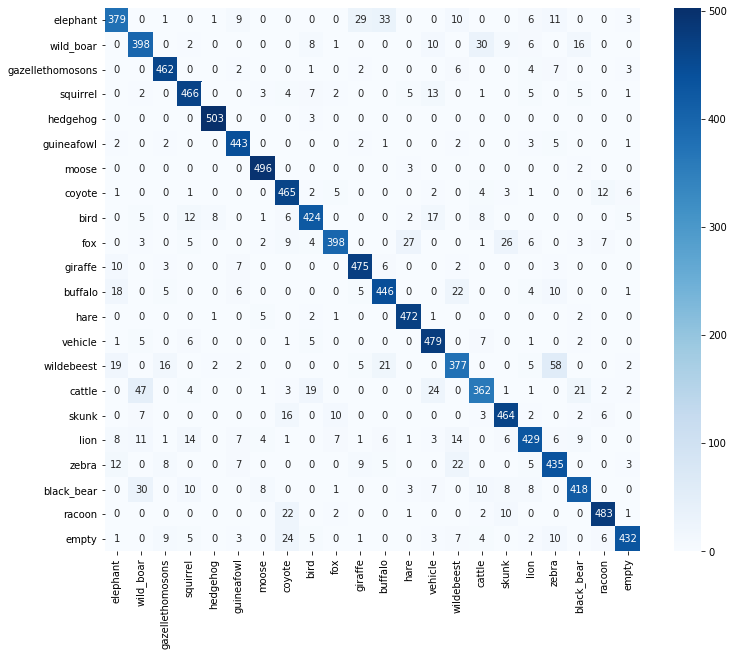

In [68]:
# C2=confusion_matrix(test_true_label,prediction_label, labels=labels)
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
C2=confusion_matrix(prediction_df['label'],prediction_df['label_pre'], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.figure(figsize=(12,10))
sns.heatmap(C2,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels,fmt='.20g')

### 8.Precision, recall, f1 score

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(prediction_df['label'],prediction_df['label_pre']))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       482
           1       0.78      0.83      0.81       480
           2       0.91      0.95      0.93       487
           3       0.89      0.91      0.90       514
           4       0.98      0.99      0.99       506
           5       0.91      0.96      0.94       461
           6       0.95      0.99      0.97       501
           7       0.84      0.93      0.88       502
           8       0.88      0.87      0.88       488
           9       0.93      0.81      0.87       491
          10       0.90      0.94      0.92       506
          11       0.86      0.86      0.86       517
          12       0.92      0.98      0.95       484
          13       0.86      0.94      0.90       507
          14       0.82      0.74      0.78       507
          15       0.84      0.74      0.79       487
          16       0.88      0.91      0.89       510
          17       0.88    